Installing the necessary extensions.

In [1]:
!pip install ngboost
!pip install scikit-learn-extra

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 6.5 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=242fe76c3f7e4e888474ce72b370dd058cd5474479e63bb27fe9a2e0d5f698c8
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.5 MB/s eta 0:00:00


Importing the necessary libraries.

In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, precision_score, recall_score, f1_score, silhouette_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn_extra.cluster import KMedoids
from xgboost import XGBRegressor
from ngboost import NGBRegressor
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt


Mounting and reading the data on standard variable 'data'.

In [3]:
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/FoDS/dataset.csv'  # Replace with your file path
data = pd.read_csv(file_path)

Mounted at /content/drive


Performing PCA on the numeric attributes of data.

In [4]:
# Loading numeric attributes of data

numeric_data = data[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']]

# Scaling the data

scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data)

# Performing PCA on the data

pca = PCA(n_components=3)
pca_components = pca.fit_transform(numeric_data_scaled)

# Extracting the PCA cells of pca_components

pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2', 'PC3'])

# Making a dataframe with only categorical attributes (not used in PCA)

categorical_data = data.drop(columns=['age', 'bmi', 'HbA1c_level', 'blood_glucose_level'])

# Making new dataframe with categorical attributes + PCA columns

data_pca = pd.concat([categorical_data, pca_df], axis=1)

# Statistics on the Pre-processed and Post-processed data

print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Number of elements in data_original:", data.size)
print("Number of elements in data_pca:", data_pca.size)
print("Number of rows in data_original:", data.shape[0])
print("Number of rows in data_pca:", data_pca.shape[0])

# Printing sample cells from both data

print("\nOriginal Data (data_original):")
print(data.head())
print("\nPCA Transformed Data with Categorical Attributes (data_pca):")
print(data_pca.head())


Explained Variance Ratio: [0.448133   0.2230434  0.16659928]
Number of elements in data_original: 22500
Number of elements in data_pca: 20000
Number of rows in data_original: 2500
Number of rows in data_pca: 2500

Original Data (data_original):
   gender_number   age  hypertension  heart_disease  smoking_number    bmi  \
0              0  72.0             0              0               1  30.66   
1              1  32.0             0              0               1  39.97   
2              1  46.0             1              1               2  28.54   
3              1  74.0             0              0               0  27.32   
4              1  32.0             0              0               2  27.30   

   HbA1c_level  blood_glucose_level  diabetes  
0          4.5                  159         0  
1          7.0                  280         1  
2          5.7                  260         1  
3          5.0                  160         0  
4          5.7                  100         0 

Performing regression on blood_glucose level across other numerical attributes.

In [5]:
# Loading the dependent and independent variables for Regression

X = data[['age', 'bmi', 'HbA1c_level']]
y = data['blood_glucose_level']

# Making training and testing splits for regression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Making the function for evaluating and extracting statistics from each Regression model

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    return rmse, mae

# Defining the models to be used

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42, max_depth=10, n_estimators=100),
    "Extra Trees": ExtraTreesRegressor(random_state=42, max_depth=10, n_estimators=100),
    "AdaBoost": AdaBoostRegressor(random_state=42, n_estimators=50),
    "XGBoost": XGBRegressor(objective='reg:squarederror', random_state=42, max_depth=5, n_estimators=100),
    "NGBoost": NGBRegressor(random_state=42, n_estimators=100, verbose =False)
}

# Storing the results in a map

results = {}
for name, model in models.items():
    rmse, mae = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[name] = {"RMSE": rmse, "MAE": mae}
    print(f"{name}: RMSE = {rmse:.2f}, MAE = {mae:.2f}")

# Printing the results

results_df = pd.DataFrame(results).T
print("\nComparison of Regression Models:")
print(results_df)


Linear Regression: RMSE = 47.36, MAE = 36.56
Random Forest: RMSE = 48.24, MAE = 37.33
Extra Trees: RMSE = 48.08, MAE = 36.70
AdaBoost: RMSE = 47.91, MAE = 38.68
XGBoost: RMSE = 52.17, MAE = 40.47
NGBoost: RMSE = 47.43, MAE = 35.56

Comparison of Regression Models:
                        RMSE        MAE
Linear Regression  47.355947  36.558859
Random Forest      48.240764  37.331256
Extra Trees        48.083156  36.698548
AdaBoost           47.910267  38.676403
XGBoost            52.169931  40.474213
NGBoost            47.434920  35.557379


Testing the various classifier models accross diabetes being the column with the labels.

In [6]:
# Loading the numeric attributes to be used to predict the column of diabetes

X = data[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
y = data['diabetes']

# Splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data of training and testing columns (scaled to training)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Performing PCA on the training and testing columns (scaled to training)

pca = PCA(n_components=3)  # Reduce to 3 components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Defining the classifier models to be tested

classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(kernel='linear'),
    "Kernel SVM": SVC(kernel='rbf'),
    "Decision Trees": DecisionTreeClassifier(),
    "Neural Networks": MLPClassifier(max_iter=1000)
}

# Defining the evalutation function for the classifiers

def evaluate_classifier(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return precision, recall, f1

# Printing the statistics on the evalutation models (on both pre-processed and post-processed data)

print("Evaluation on Original Dataset (without PCA):")
results_original = {}
for name, model in classifiers.items():
    precision, recall, f1 = evaluate_classifier(model, X_train, X_test, y_train, y_test)
    results_original[name] = {"Precision": precision, "Recall": recall, "F1-score": f1}
    print(f"{name}: Precision = {precision:.2f}, Recall = {recall:.2f}, F1-score = {f1:.2f}")

print("\nEvaluation on Pre-processed Dataset (with PCA):")
results_pca = {}
for name, model in classifiers.items():
    precision, recall, f1 = evaluate_classifier(model, X_train_pca, X_test_pca, y_train, y_test)
    results_pca[name] = {"Precision": precision, "Recall": recall, "F1-score": f1}
    print(f"{name}: Precision = {precision:.2f}, Recall = {recall:.2f}, F1-score = {f1:.2f}")

# Storing the results

results_original_df = pd.DataFrame(results_original).T
results_pca_df = pd.DataFrame(results_pca).T

# Printing the results

print("\nComparison of Classifiers on Original and PCA Datasets:")
comparison_df = pd.concat([results_original_df, results_pca_df], axis=1, keys=['Original Dataset', 'PCA Dataset'])
print(comparison_df)


Evaluation on Original Dataset (without PCA):
Logistic Regression: Precision = 0.87, Recall = 0.74, F1-score = 0.80
Naive Bayes: Precision = 0.88, Recall = 0.68, F1-score = 0.77
K-Nearest Neighbors: Precision = 0.80, Recall = 0.63, F1-score = 0.71
Linear SVM: Precision = 0.88, Recall = 0.72, F1-score = 0.79
Kernel SVM: Precision = 0.91, Recall = 0.41, F1-score = 0.57
Decision Trees: Precision = 0.83, Recall = 0.78, F1-score = 0.81
Neural Networks: Precision = 0.96, Recall = 0.65, F1-score = 0.77

Evaluation on Pre-processed Dataset (with PCA):
Logistic Regression: Precision = 0.86, Recall = 0.75, F1-score = 0.80
Naive Bayes: Precision = 0.88, Recall = 0.63, F1-score = 0.74
K-Nearest Neighbors: Precision = 0.86, Recall = 0.78, F1-score = 0.82
Linear SVM: Precision = 0.88, Recall = 0.72, F1-score = 0.79
Kernel SVM: Precision = 0.91, Recall = 0.72, F1-score = 0.80
Decision Trees: Precision = 0.78, Recall = 0.71, F1-score = 0.74
Neural Networks: Precision = 0.89, Recall = 0.77, F1-score = 

Optimal k for original dataset:


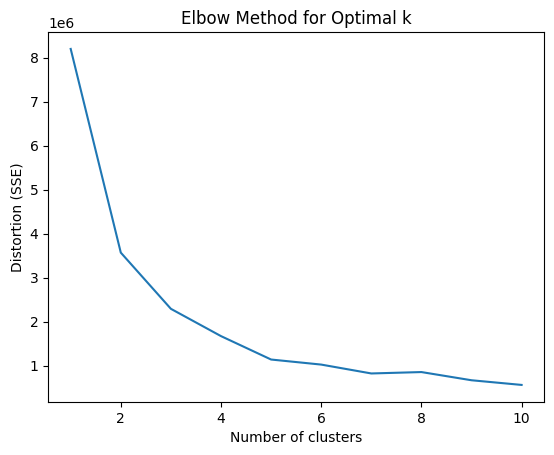


Optimal k for z-score transformed dataset:


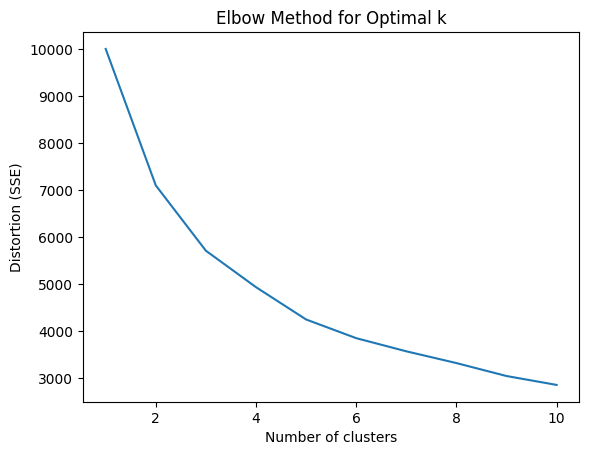


K-means clustering on original dataset:
SSE: 1139372.3408714111, Silhouette Score: 0.452733332334518

K-means clustering on z-score transformed dataset:
SSE: 4245.7412056173425, Silhouette Score: 0.25633023718754994

EM-Clustering (Gaussian Mixture Model) on original dataset:
Silhouette Score: 0.4262934971022585

EM-Clustering (Gaussian Mixture Model) on z-score transformed dataset:
Silhouette Score: 0.19420307908028686

K-medoids clustering on original dataset:
Silhouette Score: 0.4481770020343045

K-medoids clustering on z-score transformed dataset:
Silhouette Score: 0.19223318418040736

Clustering Comparison (SSE and Silhouette Score):
      Clustering Method     SSE/Score  Silhouette Score
0    K-means (Original)  1.139372e+06          0.452733
1     K-means (Z-score)  4.245741e+03          0.256330
2         EM (Original)  4.262935e-01          0.426293
3          EM (Z-score)  1.942031e-01          0.194203
4  K-medoids (Original)  4.481770e-01          0.448177
5   K-medoids (Z

In [7]:
# Loading the numeric attributes to be used to cluster the data
X = data[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']]

# Scaling the data
scaler = StandardScaler()
X_zscore = scaler.fit_transform(X)

# Defining the various clustering models
def kmeans_clustering(X, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    sse = kmeans.inertia_  # Sum of squared errors
    silhouette = silhouette_score(X, labels)
    return labels, sse, silhouette

def em_clustering(X, k):
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X)
    labels = gmm.predict(X)
    silhouette = silhouette_score(X, labels)
    return labels, silhouette

# Updated K-Medoids clustering function with new parameters
def kmedoids_clustering(X, k):
    kmedoids = KMedoids(n_clusters=k, init='k-medoids++', random_state=42)  # Adjusted parameters
    kmedoids.fit(X)
    labels = kmedoids.labels_
    silhouette = silhouette_score(X, labels)
    return labels, silhouette

def clustering_metrics(X, labels):
    silhouette = silhouette_score(X, labels)
    return silhouette

# Defining the plot printing for optimal k calculation
def optimal_k(X):
    distortions = []
    for k in range(1, 11):  # Trying from k=1 to k=10
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)

    plt.plot(range(1, 11), distortions)
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion (SSE)')
    plt.show()

# Printing the various graphs for both z_scored data and original data
print("Optimal k for original dataset:")
optimal_k(X)

print("\nOptimal k for z-score transformed dataset:")
optimal_k(X_zscore)

# Setting k = 3 for all models
k = 5

# Printing Silhouette score for k = 3
print("\nK-means clustering on original dataset:")
labels_kmeans_original, sse_original, silhouette_original = kmeans_clustering(X, k)
print(f"SSE: {sse_original}, Silhouette Score: {silhouette_original}")

print("\nK-means clustering on z-score transformed dataset:")
labels_kmeans_zscore, sse_zscore, silhouette_zscore = kmeans_clustering(X_zscore, k)
print(f"SSE: {sse_zscore}, Silhouette Score: {silhouette_zscore}")

print("\nEM-Clustering (Gaussian Mixture Model) on original dataset:")
labels_em_original, silhouette_em_original = em_clustering(X, k)
print(f"Silhouette Score: {silhouette_em_original}")

print("\nEM-Clustering (Gaussian Mixture Model) on z-score transformed dataset:")
labels_em_zscore, silhouette_em_zscore = em_clustering(X_zscore, k)
print(f"Silhouette Score: {silhouette_em_zscore}")

print("\nK-medoids clustering on original dataset:")
labels_kmedoids_original, silhouette_kmedoids_original = kmedoids_clustering(X, k)
print(f"Silhouette Score: {silhouette_kmedoids_original}")

print("\nK-medoids clustering on z-score transformed dataset:")
labels_kmedoids_zscore, silhouette_kmedoids_zscore = kmedoids_clustering(X_zscore, k)
print(f"Silhouette Score: {silhouette_kmedoids_zscore}")

# Defining results
results = {
    'Clustering Method': ['K-means (Original)', 'K-means (Z-score)', 'EM (Original)', 'EM (Z-score)', 'K-medoids (Original)', 'K-medoids (Z-score)'],
    'SSE/Score': [sse_original, sse_zscore, silhouette_em_original, silhouette_em_zscore, silhouette_kmedoids_original, silhouette_kmedoids_zscore],
    'Silhouette Score': [silhouette_original, silhouette_zscore, silhouette_em_original, silhouette_em_zscore, silhouette_kmedoids_original, silhouette_kmedoids_zscore]
}

# Printing results (SSE and Silhouette score)
results_df = pd.DataFrame(results)
print("\nClustering Comparison (SSE and Silhouette Score):")
print(results_df)
